In [25]:
import rasterio
import rasterio.plot
import rasterio.warp
from rasterio.merge import merge
from rasterio.plot import show
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import warnings
import earthpy.plot as ep
warnings.filterwarnings('ignore')

In [2]:
mypath = "./data/LC08_L1TP_178064_20150212_20170413_01_T1/"
onlyfiles = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f)) and f.endswith(".TIF")]

In [3]:
onlyfiles

['./data/LC08_L1TP_178064_20150212_20170413_01_T1/LC08_L1TP_178064_20150212_20170413_01_T1_B8.TIF',
 './data/LC08_L1TP_178064_20150212_20170413_01_T1/LC08_L1TP_178064_20150212_20170413_01_T1_BQA.TIF',
 './data/LC08_L1TP_178064_20150212_20170413_01_T1/LC08_L1TP_178064_20150212_20170413_01_T1_B9.TIF',
 './data/LC08_L1TP_178064_20150212_20170413_01_T1/LC08_L1TP_178064_20150212_20170413_01_T1_B2.TIF',
 './data/LC08_L1TP_178064_20150212_20170413_01_T1/LC08_L1TP_178064_20150212_20170413_01_T1_B3.TIF',
 './data/LC08_L1TP_178064_20150212_20170413_01_T1/LC08_L1TP_178064_20150212_20170413_01_T1_B1.TIF',
 './data/LC08_L1TP_178064_20150212_20170413_01_T1/LC08_L1TP_178064_20150212_20170413_01_T1_B4.TIF',
 './data/LC08_L1TP_178064_20150212_20170413_01_T1/LC08_L1TP_178064_20150212_20170413_01_T1_B11.TIF',
 './data/LC08_L1TP_178064_20150212_20170413_01_T1/LC08_L1TP_178064_20150212_20170413_01_T1_B10.TIF',
 './data/LC08_L1TP_178064_20150212_20170413_01_T1/LC08_L1TP_178064_20150212_20170413_01_T1_B5.TIF

In [4]:
for file in onlyfiles:
    with rasterio.open(file) as src:
        print(file)
        print(src.profile)
        print(src.bounds)
        print("----------")

./data/LC08_L1TP_178064_20150212_20170413_01_T1/LC08_L1TP_178064_20150212_20170413_01_T1_B8.TIF
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 15181, 'height': 15461, 'count': 1, 'crs': CRS.from_epsg(32634), 'transform': Affine(15.0, 0.0, 356092.5,
       0.0, -15.0, -523792.5), 'tiled': False, 'interleave': 'band'}
BoundingBox(left=356092.5, bottom=-755707.5, right=583807.5, top=-523792.5)
----------
./data/LC08_L1TP_178064_20150212_20170413_01_T1/LC08_L1TP_178064_20150212_20170413_01_T1_BQA.TIF
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7591, 'height': 7731, 'count': 1, 'crs': CRS.from_epsg(32634), 'transform': Affine(30.0, 0.0, 356085.0,
       0.0, -30.0, -523785.0), 'tiled': False, 'interleave': 'band'}
BoundingBox(left=356085.0, bottom=-755715.0, right=583815.0, top=-523785.0)
----------
./data/LC08_L1TP_178064_20150212_20170413_01_T1/LC08_L1TP_178064_20150212_20170413_01_T1_B9.TIF
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width

In [5]:
with rasterio.open(onlyfiles[0]) as dataset:
    print(dataset.indexes)
    print(dataset.crs)

(1,)
EPSG:32634


# Rendering All Bands

BoundingBox(left=356092.5, bottom=-755707.5, right=583807.5, top=-523792.5)
BoundingBox(left=356085.0, bottom=-755715.0, right=583815.0, top=-523785.0)
BoundingBox(left=356085.0, bottom=-755715.0, right=583815.0, top=-523785.0)
BoundingBox(left=356085.0, bottom=-755715.0, right=583815.0, top=-523785.0)
BoundingBox(left=356085.0, bottom=-755715.0, right=583815.0, top=-523785.0)
BoundingBox(left=356085.0, bottom=-755715.0, right=583815.0, top=-523785.0)
BoundingBox(left=356085.0, bottom=-755715.0, right=583815.0, top=-523785.0)
BoundingBox(left=356085.0, bottom=-755715.0, right=583815.0, top=-523785.0)
BoundingBox(left=356085.0, bottom=-755715.0, right=583815.0, top=-523785.0)
BoundingBox(left=356085.0, bottom=-755715.0, right=583815.0, top=-523785.0)
BoundingBox(left=356085.0, bottom=-755715.0, right=583815.0, top=-523785.0)
BoundingBox(left=356085.0, bottom=-755715.0, right=583815.0, top=-523785.0)


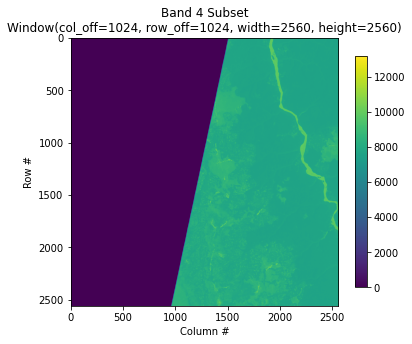

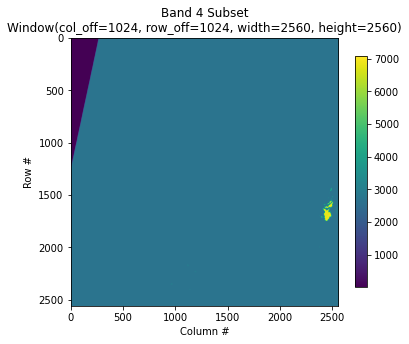

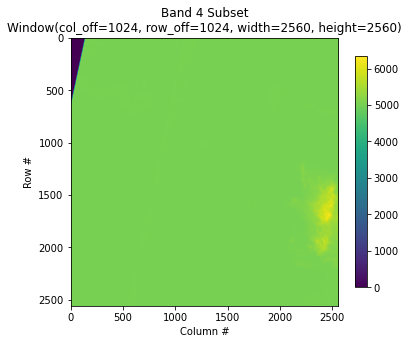

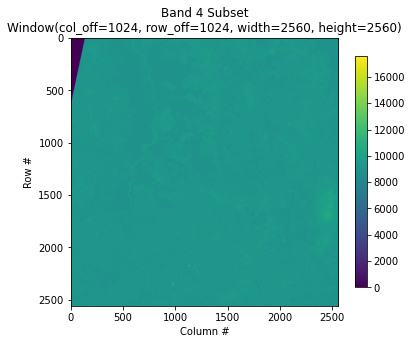

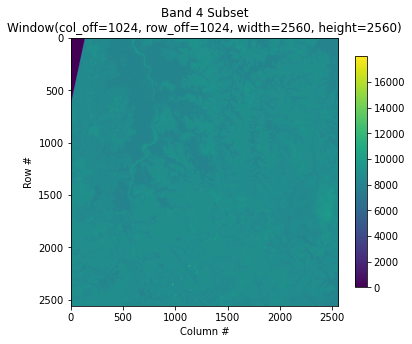

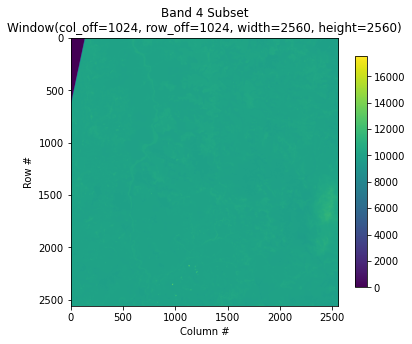

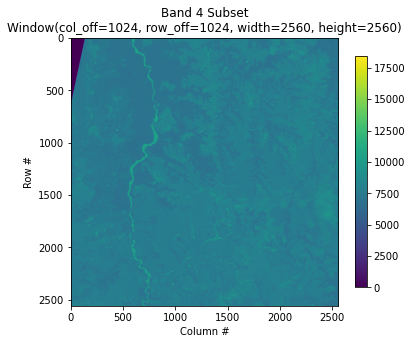

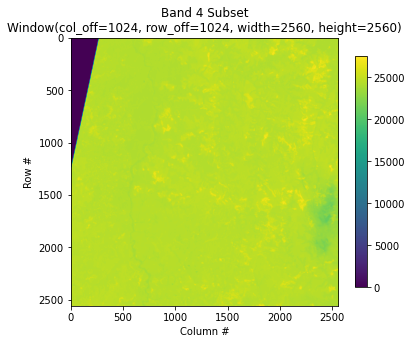

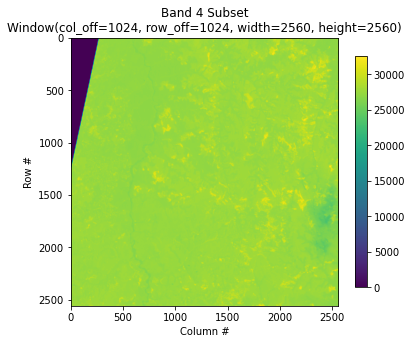

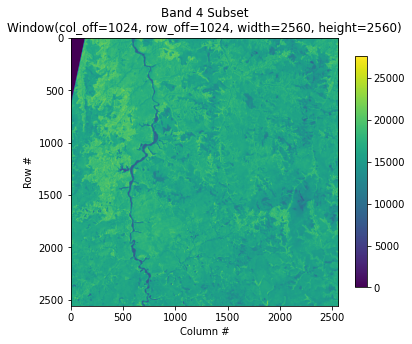

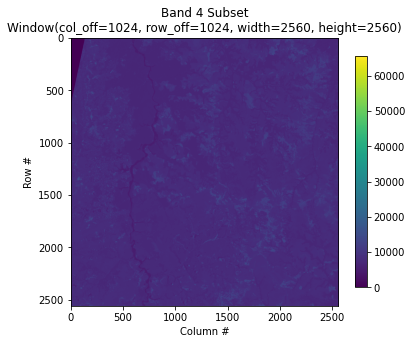

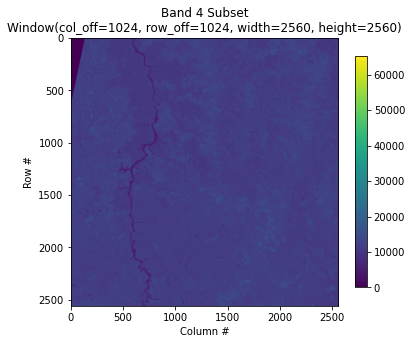

In [6]:
#https://rasterio.readthedocs.io/en/latest/topics/windowed-rw.html
#rasterio.windows.Window(col_off, row_off, width, height)
window = rasterio.windows.Window(1024, 1024, 2560, 2560)

all_rasters = {}
for number,file in enumerate(onlyfiles):
    with rasterio.open(file) as src:
        try:
            subset = src.read(3, window=window)
            all_rasters[number] = [file,subset]
            plt.figure(figsize=(6,8.5))
            plt.imshow(subset)
            plt.colorbar(shrink=0.5)
            plt.title(f'Band 4 Subset\n{window}')
            plt.xlabel('Column #')
            plt.ylabel('Row #')
            print(src.bounds)
        except:
            subset = src.read(1, window=window)
            all_rasters[number] = [file,subset]
            plt.figure(figsize=(6,8.5))
            plt.imshow(subset)
            plt.colorbar(shrink=0.5)
            plt.title(f'Band 4 Subset\n{window}')
            plt.xlabel('Column #')
            plt.ylabel('Row #')
            print(src.bounds)
            pass

# Utilizing Native RasterIO Plotting

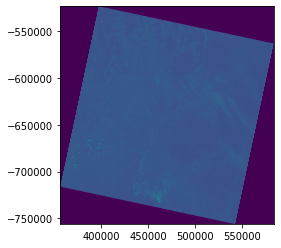

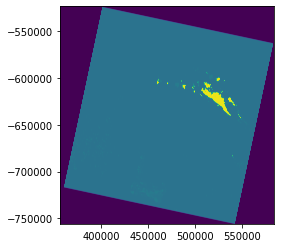

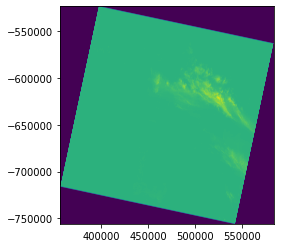

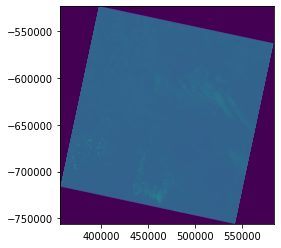

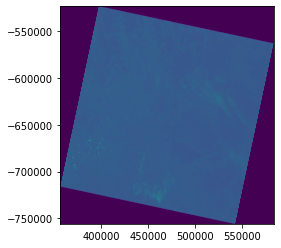

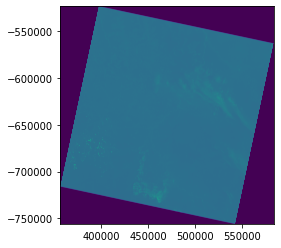

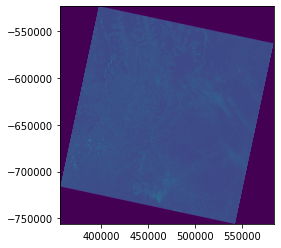

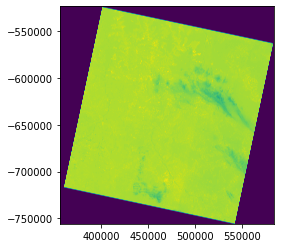

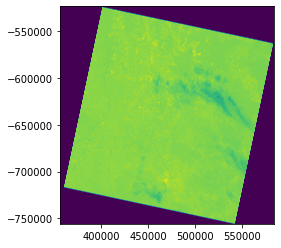

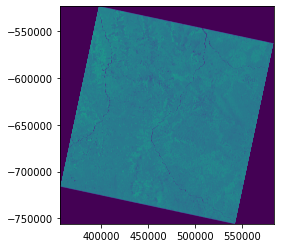

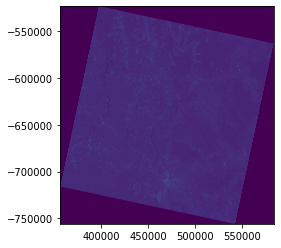

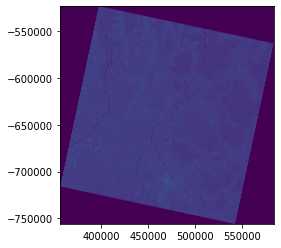

In [23]:
all_rasters = {}
for number,file in enumerate(onlyfiles):
    with rasterio.open(file) as src:
        show((src,1))

In [8]:
all_rasters

{0: ['./data/LC08_L1TP_178064_20150212_20170413_01_T1/LC08_L1TP_178064_20150212_20170413_01_T1_B8.TIF',
  array([[   0,    0,    0, ..., 7602, 7671, 7557],
         [   0,    0,    0, ..., 7601, 7611, 7477],
         [   0,    0,    0, ..., 7611, 7548, 7513],
         ...,
         [   0,    0,    0, ..., 7761, 7701, 7788],
         [   0,    0,    0, ..., 7810, 7722, 7801],
         [   0,    0,    0, ..., 7698, 7688, 7795]], dtype=uint16)],
 1: ['./data/LC08_L1TP_178064_20150212_20170413_01_T1/LC08_L1TP_178064_20150212_20170413_01_T1_BQA.TIF',
  array([[   1,    1,    1, ..., 2720, 2720, 2720],
         [   1,    1,    1, ..., 2720, 2720, 2720],
         [   1,    1,    1, ..., 2720, 2720, 2720],
         ...,
         [2720, 2720, 2720, ..., 2720, 2720, 2720],
         [2720, 2720, 2720, ..., 2720, 2720, 2720],
         [2720, 2720, 2720, ..., 2720, 2720, 2720]], dtype=uint16)],
 2: ['./data/LC08_L1TP_178064_20150212_20170413_01_T1/LC08_L1TP_178064_20150212_20170413_01_T1_B9.TIF',
 

# Merging All Bands into a single multi-raster TIFF 

In [21]:
all_datasets = [rasterio.open(file) for file in onlyfiles]

In [22]:
mosaic, out_trans = merge(all_datasets)

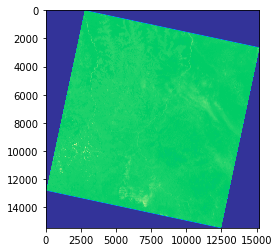

In [61]:
show(mosaic, cmap="terrain")

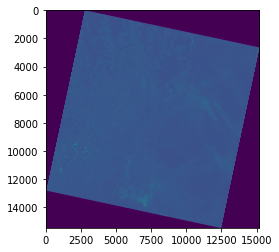

In [62]:
show(mosaic, cmap="viridis")

In [41]:
out_meta = src.meta.copy()

In [45]:
out_meta.update({"driver": "GTiff",
                  "height": mosaic.shape[1],
               "width": mosaic.shape[2],
                "transform": out_trans,
                 "crs": "+proj=utm +zone=35 +ellps=GRS80 +units=m +no_defs "})

In [55]:
print(mypath)
output_path = mypath + "composite/composite.tif"

./data/LC08_L1TP_178064_20150212_20170413_01_T1/


In [56]:
with rasterio.open(output_path,"w", **out_meta) as dest:
    dest.write(mosaic)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 15182, 'height': 15462, 'count': 1, 'crs': CRS.from_wkt('PROJCS["UTM Zone 35, Northern Hemisphere",GEOGCS["GRS 1980(IUGG, 1980)",DATUM["unknown",SPHEROID["GRS80",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",27],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]'), 'transform': Affine(15.0, 0.0, 356085.0,
       0.0, -15.0, -523785.0), 'tiled': False, 'interleave': 'band'}


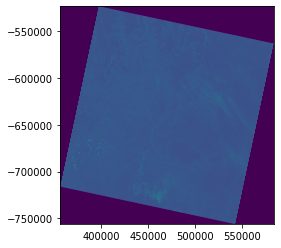

In [60]:
with rasterio.open(output_path) as src:
    print(src.profile)
    show(src,1)

# NDVI Processing 

Text(0, 0.5, 'Row #')

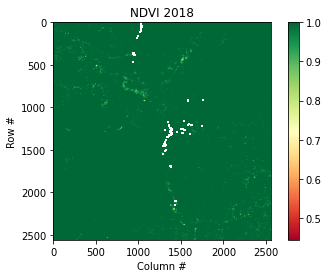

In [27]:
# attempt at NDVI processing

date = "2018"

def calc_ndvi(nir,red):
    '''Calculate NDVI from integer arrays'''
    nir = nir.astype('f4')
    red = red.astype('f4')
    ndvi = (nir - red) / (nir + red)
    return ndvi

ndvi = calc_ndvi(all_rasters[1][1],all_rasters[2][1])
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')


## Save the NDVI raster to local disk

In [28]:
onlyfiles

['./data/Hansen_GFC-2018-v1.6_datamask_10N_010E.tif',
 './data/Hansen_GFC-2018-v1.6_first_10N_010E.tif',
 './data/Hansen_GFC-2018-v1.6_lossyear_10N_010E.tif',
 './data/Hansen_GFC2013_first_10N_010E.tif',
 './data/Hansen_GFC2013_lossyear_10N_010E.tif',
 './data/Hansen_GFC-2018-v1.6_gain_10N_010E.tif']

In [30]:
filename = 'test.tif'

with rasterio.open(onlyfiles[1]) as src:
    profile = src.profile.copy()

    aff = src.transform
    newaff = rasterio.Affine(aff.a, aff.b, aff.c,
                             aff.d, aff.e, aff.f)
    profile.update({
            'dtype': 'float32',
            'height': ndvi.shape[0],
            'width': ndvi.shape[1],
            'transform': newaff})  

    with rasterio.open(filename, 'w', **profile) as dst:
        dst.write_band(1, ndvi)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 2560, 'height': 2560, 'count': 4, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00025, 0.0, 10.0,
       0.0, -0.00025, 10.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'pixel'}


Text(0, 0.5, 'Row #')

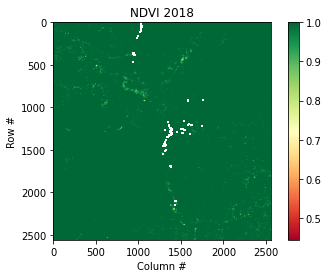

In [31]:
# Reopen the file and plot
with rasterio.open(filename) as src:
    print(src.profile)
    ndvi = src.read(1) # read the entire array

plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')

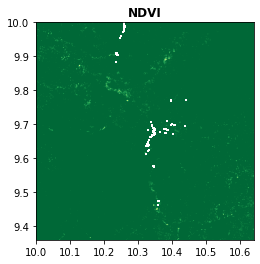

In [32]:
#geo-coordinates version

# in this case, coordinates are Easting [m] and Northing [m], and colorbar is default instead of RdYlGn
with rasterio.open(filename) as src:
    fig, ax = plt.subplots()
    rasterio.plot.show(src, ax=ax, title='NDVI', cmap='RdYlGn')

# Convert desired lat/lon to location in TIFF 

In [33]:
with rasterio.open(onlyfiles[2]) as src:
    # Use pyproj to convert point coordinates
    utm = pyproj.Proj(src.crs) # Pass CRS of image from rasterio
    lonlat = pyproj.Proj(init='epsg:4326')

    lon,lat = (10, 10)
    east,north = pyproj.transform(lonlat, utm, lon, lat)

    print('Congo Basin NDVI\n-------')
    print(f'lon,lat=\t\t({lon:.2f},{lat:.2f})')
    print(f'easting,northing=\t({east:g},{north:g})')

    # What is the corresponding row and column in our image?
    row, col = src.index(east, north) # spatial --> image coordinates
    print(f'row,col=\t\t({row},{col})')

    # What is the NDVI?
    value = ndvi[row, col]
    print(f'ndvi=\t\t\t{value:.2f}')


    # Or if you see an interesting feature and want to know the spatial coordinates:
    row, col = 200, 450
    east, north = src.xy(row,col) # image --> spatial coordinates
    lon,lat = pyproj.transform(utm, lonlat, east, north)
    value = ndvi[row, col]
    print(f'''
Interesting Feature
-------
row,col=          ({row},{col})
easting,northing= ({east:g},{north:g})
lon,lat=          ({lon:.2f},{lat:.2f})
ndvi=              {value:.2f}
''')

Congo Basin NDVI
-------
lon,lat=		(10.00,10.00)
easting,northing=	(10,10)
row,col=		(0,0)
ndvi=			1.00

Interesting Feature
-------
row,col=          (200,450)
easting,northing= (10.1126,9.94987)
lon,lat=          (9.95,10.11)
ndvi=              1.00



In [34]:
all_rasters

{0: ['./data/Hansen_GFC-2018-v1.6_datamask_10N_010E.tif',
  array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)],
 1: ['./data/Hansen_GFC-2018-v1.6_first_10N_010E.tif',
  array([[92, 92, 91, ..., 91, 94, 90],
         [93, 92, 94, ..., 99, 92, 87],
         [95, 95, 95, ..., 99, 89, 90],
         ...,
         [85, 87, 84, ..., 82, 80, 82],
         [85, 85, 85, ..., 80, 82, 80],
         [87, 88, 88, ..., 78, 81, 80]], dtype=uint8)],
 2: ['./data/Hansen_GFC-2018-v1.6_lossyear_10N_010E.tif',
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)],
 3: ['./data/Hansen_GFC2013_first_10N_010E.tif',
  array([[ 86,  87,  88, ..., 104, 105, 10

# Calculate change in NDVI over time

Text(0, 0.5, 'Row #')

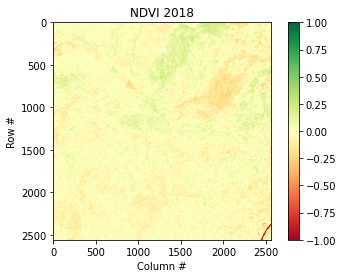

In [35]:
# Use the same example image:
date2 = '2018'

# attempt at NDVI processing

def calc_ndvi(nir,red):
    '''Calculate NDVI from integer arrays'''
    nir = nir.astype('f4')
    red = red.astype('f4')
    ndvi = (nir - red) / (nir + red)
    return ndvi

ndvi2 = calc_ndvi(all_rasters[3][1],all_rasters[1][1])
plt.imshow(ndvi2, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0.5, 1.0, 'Diff (2013 - 2018)')

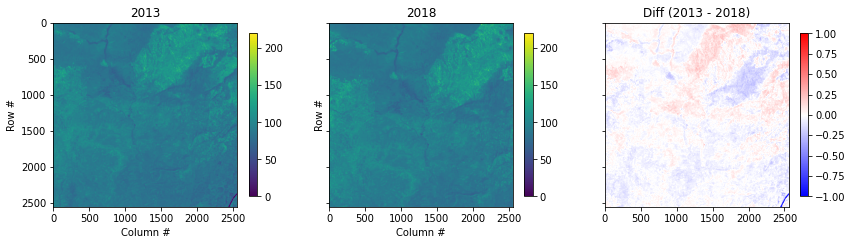

In [39]:
fig, axes = plt.subplots(1,3, figsize=(14,6), sharex=True, sharey=True)

with rasterio.open(onlyfiles[3]) as src:
    plt.sca(axes[0])
    subset = src.read(3,window=window)
    all_rasters[6] = subset
    plt.imshow(subset)
    plt.colorbar(shrink=0.5)
    plt.title("2013")
    plt.xlabel('Column #')
    plt.ylabel('Row #')

with rasterio.open(onlyfiles[1]) as src:
    plt.sca(axes[1])
    subset = src.read(3,window=window)
    plt.imshow(subset)
    plt.colorbar(shrink=0.5)
    plt.title("2018")
    plt.xlabel('Column #')
    plt.ylabel('Row #')

plt.sca(axes[2])
plt.imshow(ndvi2, cmap='bwr', vmin=-1, vmax=1)
plt.colorbar(shrink=0.5)
plt.title('Diff ({} - {})'.format("2013", "2018"))